In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
from matplotlib import rc
rc("font",family= 'Malgun Gothic')


In [3]:
data = pd.read_csv('2018~2022 자치구 매핑.csv', encoding='euc-kr')

FileNotFoundError: [Errno 2] No such file or directory: '2018~2022 자치구 매핑.csv'

In [ ]:
data

# 기준 데이터에 없는 칼럼삭제

In [ ]:
data.columns

# unique값이 1이하인 칼럼 모두 제거

- 전체가 null값이거나 null,'정량한계미만'으로 구성되는 칼럼들은 전부제거

In [ ]:
data['폴리크로리네이티트비페닐(㎎/L)'].unique()

In [103]:
# 데이터프레임에서 unique() 값이 1이하인 열 찾기
unique_counts = data.nunique()
columns_to_drop = unique_counts[unique_counts <= 1].index
columns_to_drop

Index(['구리(㎎/L)', '아연(㎎/L)', '크롬(㎎/L)', '니켈(㎎/L)', '바륨(㎎/L)', '셀레늄(㎎/L)',
       '헥사클로로벤젠 (㎍/L)', '불소(㎎/L)', '색도(㎎/L)', '노말헥산추출물질(㎎/L)', '용해성망간(㎎/L)',
       '용해성철(㎎/L)', '트리클로로에틸렌 (㎎/L)', '테트라클로로에틸렌(㎎/L)', '사염화탄소',
       '1.2-디클로로에탄(㎎/L)', '디클로로메탄(㎎/L)', '벤젠(㎎/L)', '폴리크로리네이티트비페닐(㎎/L)',
       '유기인(㎎/L)', '클로로포름 (㎎/L)', '디에틸헥실프탈레이트 (㎎/L)', '1.4-다이옥세인 (㎎/L)',
       '투명도(m)', '포름알데히드(㎎/L)'],
      dtype='object')

In [104]:

# 열 제거
data = data.drop(columns_to_drop, axis=1)

In [105]:
null_counts = data.isnull().sum()

print(null_counts)

측정소명                       0
자치구                        0
년/월/일                      0
회차                         0
수심(m)                   2641
수온(℃)                    246
DO(㎎/L)                  246
BOD(㎎/L)                 246
COD(㎎/L)                 246
클로로필 a(㎎/㎥)             1870
TN(㎎/L)                  246
TP(㎎/L)                  246
TOC(㎎/L)                 246
수소이온농도                   246
페놀류(㎎/L)                1880
전기전도도(μS/㎝)              246
총대장균군수(총대장균군수/100ml)    1872
카드뮴(㎎/L)                3203
시안(㎎/L)                 3203
납(㎎/L)                  3203
6가크롬(㎎/L)               3203
비소(㎎/L)                 3203
수은(㎎/L)                 3203
용존총질소(㎎/L)              1413
암모니아성 질소(㎎/L)           1413
질산성 질소(㎎/L)             1413
용존총인(㎎/L)               1413
인산염인(㎎/L)               1413
SS(㎎/L)                  246
분원성대장균군수                1872
음이온계면활성제(㎎/L)           3203
안티몬 (㎎/L)               3203
유량(㎥/s)                 1862
dtype: int64


In [106]:
data.columns

Index(['측정소명', '자치구', '년/월/일', '회차', '수심(m)', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)',
       'COD(㎎/L)', '클로로필 a(㎎/㎥)', 'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)', '수소이온농도',
       '페놀류(㎎/L)', '전기전도도(μS/㎝)', '총대장균군수(총대장균군수/100ml)', '카드뮴(㎎/L)',
       '시안(㎎/L)', '납(㎎/L)', '6가크롬(㎎/L)', '비소(㎎/L)', '수은(㎎/L)', '용존총질소(㎎/L)',
       '암모니아성 질소(㎎/L)', '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)',
       '분원성대장균군수', '음이온계면활성제(㎎/L)', '안티몬 (㎎/L)', '유량(㎥/s)'],
      dtype='object')

- 정량한계미만이라는 값을 null으로 바꾸고 전부 null값으로 이루어진 행은 삭제

In [107]:
data = data.replace('정량한계미만', np.nan)

In [108]:
# '측정소명', '년/월/일', '회차' 칼럼을 제외한 칼럼들의 리스트
columns_to_check = data.columns.difference(['측정소명', '년/월/일', '회차','자치구'])

# 해당 행을 제거
data = data.dropna(subset=columns_to_check, how='all')

In [109]:
data = data.reset_index(drop=True)

In [110]:
data.drop(['수심(m)','유량(㎥/s)'],axis=1,inplace=True)

In [111]:
data.drop('회차',axis=1,inplace=True)

In [112]:
# 데이터프레임에서 unique() 값이 1인 열 찾기
unique_counts = data.nunique()
columns_to_drop = unique_counts[unique_counts <= 1].index
columns_to_drop

Index(['페놀류(㎎/L)', '카드뮴(㎎/L)', '시안(㎎/L)', '납(㎎/L)', '비소(㎎/L)'], dtype='object')

0이거나 null값으로만 이루어진 칼럼들 전부제거

In [113]:
data.drop(['페놀류(㎎/L)', '카드뮴(㎎/L)', '시안(㎎/L)', '납(㎎/L)', '비소(㎎/L)'],axis=1,inplace=True)

In [114]:
data.columns

Index(['측정소명', '자치구', '년/월/일', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
       '클로로필 a(㎎/㎥)', 'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)', '수소이온농도',
       '전기전도도(μS/㎝)', '총대장균군수(총대장균군수/100ml)', '6가크롬(㎎/L)', '수은(㎎/L)',
       '용존총질소(㎎/L)', '암모니아성 질소(㎎/L)', '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)',
       'SS(㎎/L)', '분원성대장균군수', '음이온계면활성제(㎎/L)', '안티몬 (㎎/L)'],
      dtype='object')

구글링해서 구체적인 오염 기준이 안나와있는 칼럼도 전부 제거

In [115]:
data.drop(['용존총질소(㎎/L)','암모니아성 질소(㎎/L)', '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)','전기전도도(μS/㎝)'],axis=1,inplace=True)

In [116]:
data

,측정소명,자치구,년/월/일,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),클로로필 a(㎎/㎥),TN(㎎/L),TP(㎎/L),TOC(㎎/L),수소이온농도,총대장균군수(총대장균군수/100ml),6가크롬(㎎/L),수은(㎎/L),SS(㎎/L),분원성대장균군수,음이온계면활성제(㎎/L),안티몬 (㎎/L)
0,노량진,용산구,2018.1.2,3.6,12.3,1.2,4.7,3.4,6.125,0.045,2.7,8.1,530.0,NaN,NaN,3.7,200.0,NaN,NaN
1,가양,강서구,2018.1.3,2.1,15.2,1.3,4.9,12.9,5.821,0.060,2.8,8.4,4800.0,NaN,NaN,19.0,70.0,NaN,NaN
2,고덕천,강동구,2018.1.4,0.8,15.4,2.1,2.9,5.8,3.648,0.045,1.9,7.7,3000.0,NaN,NaN,6.2,290.0,NaN,NaN
3,도림천,동작구,2018.1.4,0.2,12.2,4.4,5.8,2.2,7.130,0.153,3.6,7.4,12000.0,NaN,NaN,2.6,210.0,NaN,NaN
4,목감천1,구로구,2018.1.4,3.1,12.2,2.6,5.8,6.1,7.785,0.096,4.0,7.7,8900.0,NaN,NaN,4.2,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,노량진,용산구,2022.12.22,1.8,13.2,1.1,3.5,4.5,4.596,0.026,2.3,8.3,410.0,NaN,NaN,1.7,250.0,NaN,NaN
3547,안양천9,구로구,2022.12.22,5.1,12.5,1.6,8.1,NaN,9.489,0.087,5.7,7.8,NaN,NaN,NaN,3.5,NaN,NaN,NaN
3548,중랑천3,도봉구,2022.12.22,6.6,11.4,2.6,5.9,NaN,8.925,0.168,3.9,8.1,NaN,NaN,NaN,4.5,NaN,NaN,NaN
3549,노량진,용산구,2022.12.26,0.7,13.5,1.4,4.2,5.8,4.948,0.040,2.8,8.0,530.0,NaN,NaN,2.6,190.0,NaN,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   측정소명                  3551 non-null   object 
 1   자치구                   3551 non-null   object 
 2   년/월/일                 3551 non-null   object 
 3   수온(℃)                 3551 non-null   float64
 4   DO(㎎/L)               3551 non-null   float64
 5   BOD(㎎/L)              3551 non-null   float64
 6   COD(㎎/L)              3551 non-null   float64
 7   클로로필 a(㎎/㎥)           1927 non-null   float64
 8   TN(㎎/L)               3551 non-null   float64
 9   TP(㎎/L)               3551 non-null   float64
 10  TOC(㎎/L)              3551 non-null   float64
 11  수소이온농도                3551 non-null   float64
 12  총대장균군수(총대장균군수/100ml)  1925 non-null   float64
 13  6가크롬(㎎/L)             341 non-null    object 
 14  수은(㎎/L)               437 non-null    object 
 15  SS(㎎/L)              

In [118]:
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print()

Column: 측정소명
노량진      256
가양       246
초이천      195
망월천      195
감이천      195
양재천1     194
안양천8     194
목감천2     194
중랑천3     193
안양천9     193
구의       193
청계천2      60
홍제천       60
탄천6       60
청계천3      60
청계천1      60
안양천10     60
고덕천       60
도림천       60
목감천1      60
중랑천6      60
성북천       60
성내천       60
양재천2      60
우이천       60
정릉천       60
중랑천4      60
중랑천5      60
잠실        60
보광        58
영등포       58
암사        56
뚝도        51
Name: 측정소명, dtype: int64

Column: 자치구
강동구     759
구로구     641
용산구     314
송파구     256
강서구     245
성동구     231
서초구     194
도봉구     193
동대문구    180
강남구     120
마포구      60
성북구      60
중구       60
노원구      60
양천구      60
동작구      60
영등포구     58
Name: 자치구, dtype: int64

Column: 년/월/일
2018.6.7      28
2020.1.16     25
2020.6.4      25
2021.12.9     24
2019.10.10    24
              ..
2020.10.26     1
2020.11.10     1
2020.11.23     1
2020.11.30     1
2022.12.27     1
Name: 년/월/일, Length: 675, dtype: int64

Column: 수온(℃)
23.3    32
23.5    30
22.3    27
24.

- 해당 음이온 계면활성제와 안티몬 값을 보면 전부 정상범위 안에 들어와서 두 칼럼도 제거하는것이 맞다고 생각함


- 저 두칼럼을 제거하고 기준데이터를 보았을때 7등분하는것이 맞다고 생각함
등급 :매우좋음,좋음,약간좋음,보통,약간나쁨,나쁨,매우나쁨

In [119]:
data.drop(['6가크롬(㎎/L)','수은(㎎/L)','총대장균군수(총대장균군수/100ml)','분원성대장균군수','클로로필 a(㎎/㎥)','음이온계면활성제(㎎/L)','안티몬 (㎎/L)'],axis=1,inplace=True)

In [120]:
data

,측정소명,자치구,년/월/일,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),TN(㎎/L),TP(㎎/L),TOC(㎎/L),수소이온농도,SS(㎎/L)
0,노량진,용산구,2018.1.2,3.6,12.3,1.2,4.7,6.125,0.045,2.7,8.1,3.7
1,가양,강서구,2018.1.3,2.1,15.2,1.3,4.9,5.821,0.060,2.8,8.4,19.0
2,고덕천,강동구,2018.1.4,0.8,15.4,2.1,2.9,3.648,0.045,1.9,7.7,6.2
3,도림천,동작구,2018.1.4,0.2,12.2,4.4,5.8,7.130,0.153,3.6,7.4,2.6
4,목감천1,구로구,2018.1.4,3.1,12.2,2.6,5.8,7.785,0.096,4.0,7.7,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
3546,노량진,용산구,2022.12.22,1.8,13.2,1.1,3.5,4.596,0.026,2.3,8.3,1.7
3547,안양천9,구로구,2022.12.22,5.1,12.5,1.6,8.1,9.489,0.087,5.7,7.8,3.5
3548,중랑천3,도봉구,2022.12.22,6.6,11.4,2.6,5.9,8.925,0.168,3.9,8.1,4.5
3549,노량진,용산구,2022.12.26,0.7,13.5,1.4,4.2,4.948,0.040,2.8,8.0,2.6


# 가중치 점수 매김

- 1이면 매우좋음 7이면 매우나쁨

In [121]:
def assign_score_bod(value):
    if value <= 5:
        return 0
    else:
        return 1

# lambda 함수에 함수 적용
data['BOD_score'] = data['BOD(㎎/L)'].apply(lambda x: assign_score_bod(x))

In [122]:
print(data['BOD_score'].value_counts())

0    3304
1     247
Name: BOD_score, dtype: int64


In [123]:
def assign_score_cod(value):
    if value <= 7:
        return 0
    else:
        return 1

# lambda 함수에 함수 적용
data['COD_score'] = data['COD(㎎/L)'].apply(lambda x: assign_score_cod(x))

In [124]:
print(data['COD_score'].value_counts())

0    2753
1     798
Name: COD_score, dtype: int64


In [125]:
def assign_score_toc(value):
     if value <= 5:
        return 0
     else:
        return 1

# lambda 함수에 함수 적용
data['TOC_score'] = data['TOC(㎎/L)'].apply(lambda x: assign_score_toc(x))

In [126]:
print(data['TOC_score'].value_counts())

0    3159
1     392
Name: TOC_score, dtype: int64


In [127]:
def assign_score_tp(value):
    if value <= 0.2:
        return 0
    else:
        return 1

# lambda 함수에 함수 적용
data['TP_score'] = data['TP(㎎/L)'].apply(lambda x: assign_score_tp(x))

In [128]:
print(data['TP_score'].value_counts())

0    3032
1     519
Name: TP_score, dtype: int64


In [129]:
def assign_score_ss(value):
    if value <= 25:
        return 0
   
    else:
        return 1

# lambda 함수에 함수 적용
data['ss_score'] = data['SS(㎎/L)'].apply(lambda x: assign_score_ss(x))

In [130]:
print(data['ss_score'].value_counts())

0    3163
1     388
Name: ss_score, dtype: int64


In [131]:
def assign_score_do(value):
    if value >=5:
        return 0
   
    else:
        return 1

# lambda 함수에 함수 적용
data['do_score'] = data['DO(㎎/L)'].apply(lambda x: assign_score_do(x))

In [132]:
print(data['do_score'].value_counts())

0    3514
1      37
Name: do_score, dtype: int64


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정소명       3551 non-null   object 
 1   자치구        3551 non-null   object 
 2   년/월/일      3551 non-null   object 
 3   수온(℃)      3551 non-null   float64
 4   DO(㎎/L)    3551 non-null   float64
 5   BOD(㎎/L)   3551 non-null   float64
 6   COD(㎎/L)   3551 non-null   float64
 7   TN(㎎/L)    3551 non-null   float64
 8   TP(㎎/L)    3551 non-null   float64
 9   TOC(㎎/L)   3551 non-null   float64
 10  수소이온농도     3551 non-null   float64
 11  SS(㎎/L)    3551 non-null   float64
 12  BOD_score  3551 non-null   int64  
 13  COD_score  3551 non-null   int64  
 14  TOC_score  3551 non-null   int64  
 15  TP_score   3551 non-null   int64  
 16  ss_score   3551 non-null   int64  
 17  do_score   3551 non-null   int64  
dtypes: float64(9), int64(6), object(3)
memory usage: 499.5+ KB


In [134]:
data['pollution_score'] = (
    data['BOD_score'] +
    data['COD_score'] +
    data['TOC_score'] +
    data['TP_score'] +
    data['ss_score'] +
    data['do_score']
)


In [135]:
data['pollution_score'].value_counts()

0    2333
1     544
2     350
3     199
4      88
5      34
6       3
Name: pollution_score, dtype: int64

In [138]:
data.columns

Index(['측정소명', '자치구', '년/월/일', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
       'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)', '수소이온농도', 'SS(㎎/L)', 'BOD_score',
       'COD_score', 'TOC_score', 'TP_score', 'ss_score', 'do_score',
       'pollution_score'],
      dtype='object')

In [139]:
data.drop(['BOD_score','COD_score', 'TOC_score', 'TP_score', 'ss_score', 'do_score'],axis=1,inplace=True)

In [140]:
data

,측정소명,자치구,년/월/일,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),TN(㎎/L),TP(㎎/L),TOC(㎎/L),수소이온농도,SS(㎎/L),pollution_score
0,노량진,용산구,2018.1.2,3.6,12.3,1.2,4.7,6.125,0.045,2.7,8.1,3.7,0
1,가양,강서구,2018.1.3,2.1,15.2,1.3,4.9,5.821,0.060,2.8,8.4,19.0,0
2,고덕천,강동구,2018.1.4,0.8,15.4,2.1,2.9,3.648,0.045,1.9,7.7,6.2,0
3,도림천,동작구,2018.1.4,0.2,12.2,4.4,5.8,7.130,0.153,3.6,7.4,2.6,0
4,목감천1,구로구,2018.1.4,3.1,12.2,2.6,5.8,7.785,0.096,4.0,7.7,4.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,노량진,용산구,2022.12.22,1.8,13.2,1.1,3.5,4.596,0.026,2.3,8.3,1.7,0
3547,안양천9,구로구,2022.12.22,5.1,12.5,1.6,8.1,9.489,0.087,5.7,7.8,3.5,2
3548,중랑천3,도봉구,2022.12.22,6.6,11.4,2.6,5.9,8.925,0.168,3.9,8.1,4.5,0
3549,노량진,용산구,2022.12.26,0.7,13.5,1.4,4.2,4.948,0.040,2.8,8.0,2.6,0


In [142]:
data.to_csv('final.csv', index=False,encoding='CP949')

In [40]:
data['년/월/일'].unique()

array(['2018/01/02', '2018/01/03', '2018/01/04', '2018/01/08',
       '2018/01/10', '2018/01/11', '2018/01/15', '2018/01/16',
       '2018/01/17', '2018/01/22', '2018/01/24', '2018/01/29',
       '2018/02/01', '2018/02/05', '2018/02/06', '2018/02/12',
       '2018/02/13', '2018/02/21', '2018/02/22', '2018/02/26',
       '2018/02/27', '2018/03/05', '2018/03/06', '2018/03/08',
       '2018/03/13', '2018/03/14', '2018/03/20', '2018/03/22',
       '2018/03/27', '2018/03/29', '2018/03/30', '2018/04/03',
       '2018/04/05', '2018/04/10', '2018/04/11', '2018/04/12',
       '2018/04/18', '2018/04/19', '2018/04/20', '2018/04/24',
       '2018/04/25', '2018/04/26', '2018/05/02', '2018/05/03',
       '2018/05/04', '2018/05/08', '2018/05/10', '2018/05/11',
       '2018/05/17', '2018/05/23', '2018/05/24', '2018/05/25',
       '2018/05/28', '2018/05/31', '2018/06/07', '2018/06/12',
       '2018/06/14', '2018/06/15', '2018/06/19', '2018/06/20',
       '2018/06/22', '2018/06/25', '2018/06/26', '2018/

In [41]:
data['년/월/일'] = pd.to_datetime(data['년/월/일'])


data['year'] = data['년/월/일'].dt.year
data['month'] = data['년/월/일'].dt.month


In [42]:
data

,측정소명,년/월/일,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),TN(㎎/L),TP(㎎/L),TOC(㎎/L),수소이온농도,SS(㎎/L),BOD_score,COD_score,TOC_score,TP_score,ss_score,do_score,pollution,year,month
0,노량진,2018-01-02,3.6,12.3,1.2,4.7,6.125,0.045,2.7,8.1,3.7,0,0,0,0,0,0,0,2018,1
1,가양,2018-01-03,2.1,15.2,1.3,4.9,5.821,0.060,2.8,8.4,19.0,0,0,0,0,0,0,0,2018,1
2,고덕천,2018-01-04,0.8,15.4,2.1,2.9,3.648,0.045,1.9,7.7,6.2,0,0,0,0,0,0,0,2018,1
3,도림천,2018-01-04,0.2,12.2,4.4,5.8,7.130,0.153,3.6,7.4,2.6,0,0,0,0,0,0,0,2018,1
4,목감천1,2018-01-04,3.1,12.2,2.6,5.8,7.785,0.096,4.0,7.7,4.2,0,0,0,0,0,0,0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,노량진,2022-12-22,1.8,13.2,1.1,3.5,4.596,0.026,2.3,8.3,1.7,0,0,0,0,0,0,0,2022,12
3547,안양천9,2022-12-22,5.1,12.5,1.6,8.1,9.489,0.087,5.7,7.8,3.5,0,1,1,0,0,0,2,2022,12
3548,중랑천3,2022-12-22,6.6,11.4,2.6,5.9,8.925,0.168,3.9,8.1,4.5,0,0,0,0,0,0,0,2022,12
3549,노량진,2022-12-26,0.7,13.5,1.4,4.2,4.948,0.040,2.8,8.0,2.6,0,0,0,0,0,0,0,2022,12


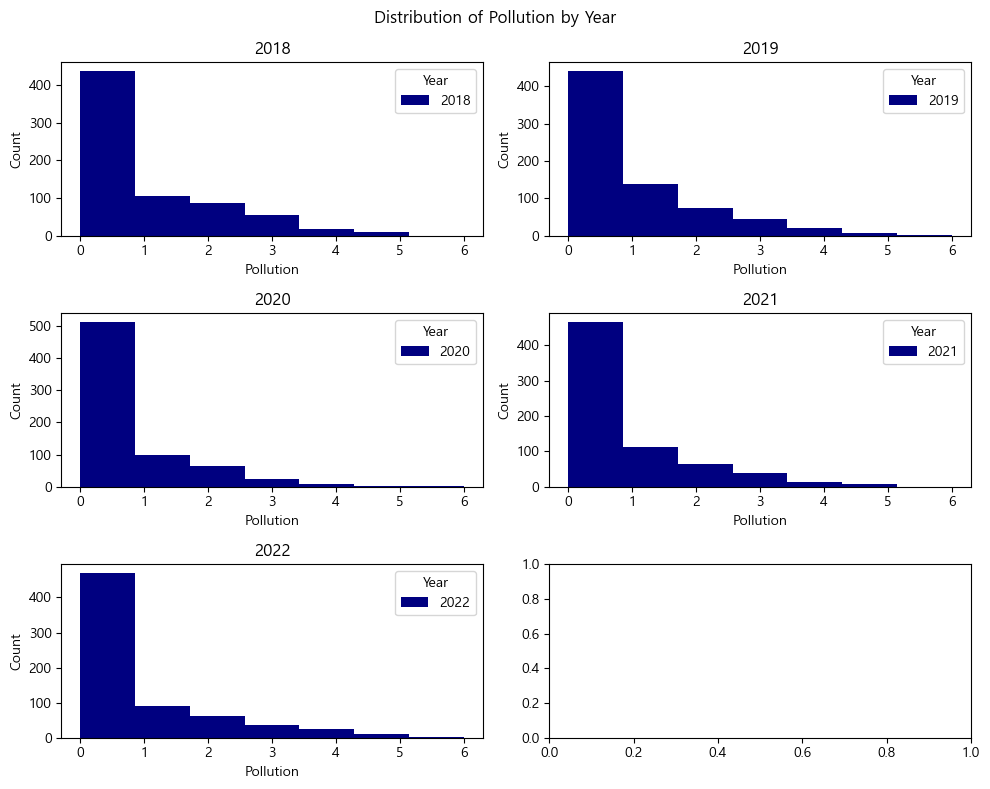

In [43]:
# 서브플롯 설정
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.suptitle('Distribution of Pollution by Year')

# 연도별 오염도 데이터 추출
years = data['year'].unique()
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    
    # 연도별 오염도 분포 히스토그램 생성
    ax = axs[row, col]
    blue_color = (0, 0, 0.5)
    ax.hist(data[data['year'] == year]['pollution'], bins=7, range=(0, 6), label=str(year),color=blue_color)
    ax.set_title(str(year))
    ax.set_xlabel('Pollution')
    ax.set_ylabel('Count')
    ax.legend(title='Year')
    ax.set_xticks(range(7))

plt.tight_layout()
plt.show()

In [44]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

data['season'] = data['month'].apply(get_season)

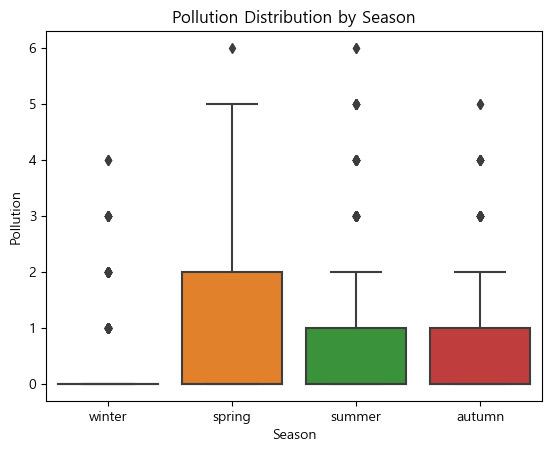

In [45]:
sns.boxplot(data=data, x='season', y='pollution')
plt.xlabel('Season')
plt.ylabel('Pollution')
plt.title('Pollution Distribution by Season')
plt.show()

In [46]:
# 데이터프레임에서 측정소명과 pollution 칼럼 추출
subset = data[['측정소명', 'pollution']]

# 측정소별 pollution 평균값 계산
mean_pollution = subset.groupby('측정소명')['pollution'].mean()

# 평균값을 내림차순으로 정렬
sorted_mean_pollution = mean_pollution.sort_values(ascending=False)

print("평균 pollution 내림차순:")
print(sorted_mean_pollution)

평균 pollution 내림차순:
측정소명
안양천9     2.005181
안양천8     1.953608
목감천2     1.618557
중랑천3     1.233161
안양천10    1.183333
망월천      1.128205
감이천      1.005128
중랑천6     0.866667
초이천      0.835897
탄천6      0.650000
목감천1     0.633333
성내천      0.600000
양재천1     0.510309
가양       0.284553
고덕천      0.150000
중랑천4     0.150000
양재천2     0.116667
우이천      0.083333
노량진      0.070312
보광       0.068966
영등포      0.068966
중랑천5     0.066667
구의       0.051813
청계천3     0.050000
도림천      0.033333
정릉천      0.033333
홍제천      0.016667
성북천      0.016667
청계천1     0.000000
청계천2     0.000000
잠실       0.000000
뚝도       0.000000
암사       0.000000
Name: pollution, dtype: float64


In [48]:
len(data['측정소명'].unique())

33

In [55]:
subset = data[data['측정소명'].str.contains('안양천9')].head(50)
print(subset)

    측정소명      년/월/일  수온(℃)  DO(㎎/L)  BOD(㎎/L)  COD(㎎/L)  TN(㎎/L)  TP(㎎/L)  \
0   안양천9 2018-01-02    3.6     12.3       1.2       4.7    6.125    0.045   
1   안양천9 2018-01-03    2.1     15.2       1.3       4.9    5.821    0.060   
2   안양천9 2018-01-04    0.8     15.4       2.1       2.9    3.648    0.045   
3   안양천9 2018-01-04    0.2     12.2       4.4       5.8    7.130    0.153   
4   안양천9 2018-01-04    3.1     12.2       2.6       5.8    7.785    0.096   
5   안양천9 2018-01-04    1.7     13.0       2.4       3.4    3.675    0.061   
6   안양천9 2018-01-04    3.9     11.9       1.8       3.2    4.223    0.036   
7   안양천9 2018-01-04    3.0     12.0       2.2       6.3   11.322    0.066   
8   안양천9 2018-01-04    0.6     14.2       1.8       3.9    7.140    0.049   
9   안양천9 2018-01-04    1.3     15.6       2.0       3.8    7.949    0.030   
10  안양천9 2018-01-04    5.6     13.7       1.2       1.8    6.299    0.025   
11  안양천9 2018-01-04    8.0     13.2       1.6       4.8    9.433    0.042   